In [6]:
import pandas as pd
import numpy as np
import scipy.stats


df = pd.read_csv('data\\ts_1.csv', engine="python")

df.head()

,Unnamed: 0,TRDATETIME,amount
0,0,21OCT17:00:00:00,5023.0
1,1,12OCT17:12:24:07,20000.0
2,2,05DEC17:00:00:00,767.0
3,3,21OCT17:00:00:00,2031.0
4,4,24OCT17:13:14:24,36562.0


In [7]:
from datetime import datetime

#time series to daily
df['TRDATETIME']=pd.to_datetime(df['TRDATETIME'], format='%d%b%y:%H:%M:%S')
df['TRDATETIME']=df['TRDATETIME'].dt.round('1d')  

In [9]:
df.head()

,Unnamed: 0,TRDATETIME,amount
0,0,2017-10-21,5023.0
1,1,2017-10-13,20000.0
2,2,2017-12-05,767.0
3,3,2017-10-21,2031.0
4,4,2017-10-25,36562.0


In [10]:
#aggregation
df_daily=df.groupby('TRDATETIME', as_index=False).agg({"amount": "sum"})
df_daily=df_daily.sort_values('TRDATETIME')
df_daily.head()

,TRDATETIME,amount
0,2016-10-07,6307.00
1,2016-10-08,91026.59
2,2016-10-09,2446.15
3,2016-10-10,86538.95
4,2016-10-11,570745.17


Text(0, 0.5, 'Summ')

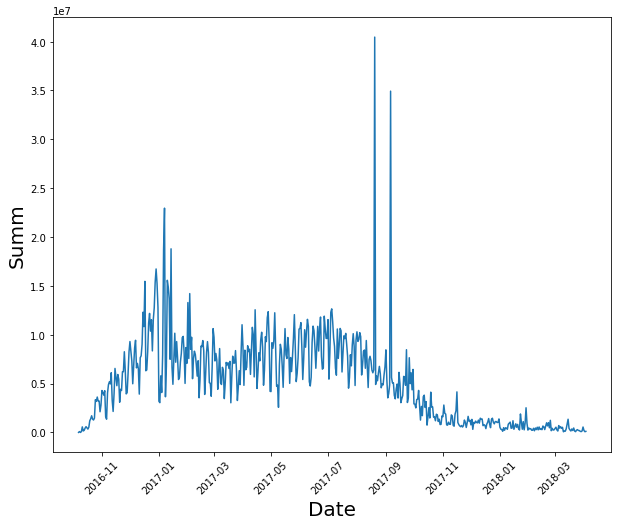

In [12]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))

plt.plot(df_daily['TRDATETIME'],df_daily['amount'])

plt.xticks(rotation=45)

plt.xlabel(u'Date', fontsize = 20)
plt.ylabel(u'Summ', fontsize = 20)

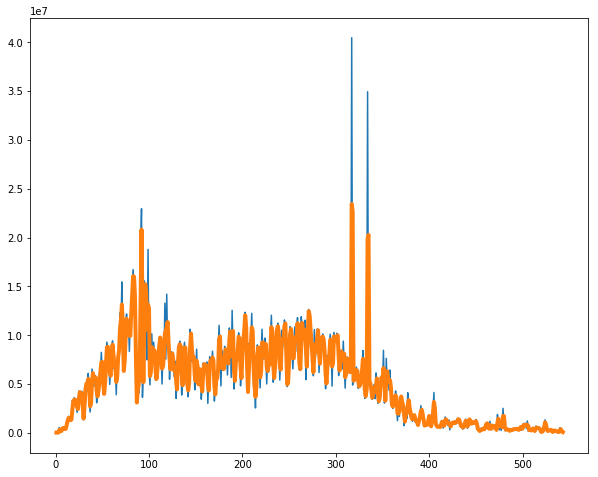

In [13]:
#rol mean filtering

rol_mean=df_daily['amount'].rolling(2).mean()

plt.figure(figsize=(10, 8))

plt.plot(df_daily['amount'])
plt.plot(rol_mean, linewidth=4)

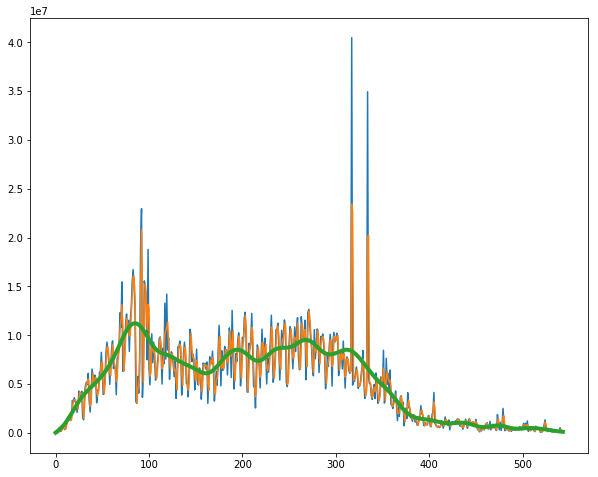

In [15]:
from scipy import signal

fs = 1000 #sampling frequency
fc = 30  #cut frequency
w = fc / (fs / 2) #normalisation

b, a = signal.butter(5, w, 'low')
output_btw = signal.filtfilt(b, a, df_daily['amount'])

plt.figure(figsize=(10, 8))

plt.plot(df_daily['amount'])
plt.plot(rol_mean)
plt.plot(output_btw, linewidth=4)

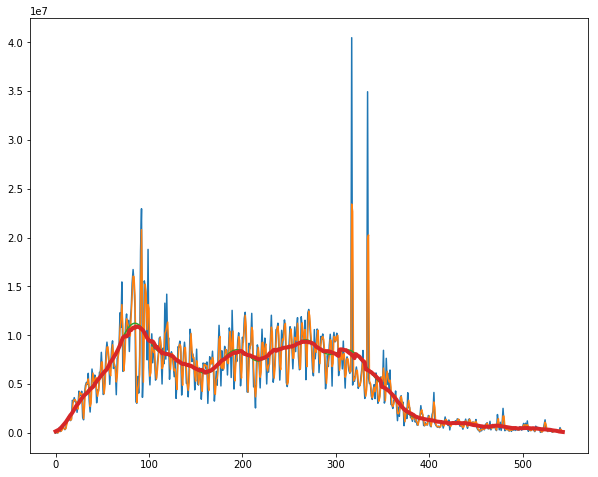

In [16]:
from scipy import signal
from scipy.ndimage import filters

#gauss filter parameters
windows_size=28
gauss_sd=10
#windows setup
window = signal.gaussian(windows_size, gauss_sd)
#convolution for the series and window
output_gauss=signal.convolve(df_daily['amount'], window/window.sum(), mode='same')


plt.figure(figsize=(10, 8))

plt.plot(df_daily['amount'])
plt.plot(rol_mean)
plt.plot(output_btw)
plt.plot(output_gauss, linewidth=4)